In [1]:
from datasets import Adult
from NCorrFP.NCorrFP import NCorrFP

import argparse
import os
from itertools import product
from pprint import pprint

In [2]:
param = {'gamma': 2,#, 4, 8, 16, 32],
              'k': 500, #, 1000],
              'fingerprint_length': 128, #, 256, 512],#, 128, 256],  # , 128, 256],
              'n_recipients': 20,
              'sk': 100,
              'id': 0
             }

In [3]:
scheme = NCorrFP(gamma=param['gamma'], fingerprint_bit_length=param['fingerprint_length'], k=param['k'],
                             number_of_recipients=param['n_recipients'], fingerprint_code_type='tardos')

In [4]:
data = Adult()
data.dataframe.head()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.correlated_attributes

[['relationship', 'age', 'marital-status', 'sex'],
 ['education', 'education-num']]

In [6]:
data.columns

Index(['Id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
fp_data = scheme.insertion(data, secret_key=param['sk'], recipient_id=param['id'],
                             correlated_attributes=data.correlated_attributes, save_computation=True, 
                           outfile='adult_fp_temp.csv')

Start the NCorr fingerprint insertion algorithm...
	gamma: 2
	correlated attributes: [['relationship', 'age', 'marital-status', 'sex'], ['education', 'education-num']]

Generated a tardos fingerprint for recipient 0: 10001111000100011101001000101101011010000110011111010100110011010101110100101101101010010111100101111000100100101000100101001111
Inserting the fingerprint...

Training balltrees in: 0.2904 sec.
[2]
[1, 5, 4, 0]
[4]
[5, 1, 6, 7, 0, 2]
[0]
[1]
[0]
[1]
[4]
[3, 0, 1, 2]
[0]
[1]
[1]
[2, 3, 0, 4]
[4]
[3, 0, 1, 2]
[8]
[2, 9, 5, 11, 13, 10, 4, 14, 7, 3, 6, 0, 1, 12]
[0]
[1]
[38]
[37, 36, 24, 20, 18, 13, 12, 10, 7, 40, 27, 11, 5, 39, 30, 26, 23, 22, 19, 29, 8, 6, 32, 2, 0, 25]
[0]
[1, 3, 2]
[1]
[0]
[38]
[40, 37, 34, 31, 27, 24, 23, 14, 13, 12, 6, 3, 1, 39, 28, 21, 18, 8, 2, 30, 11, 22, 5, 29, 32, 0, 25]
[0]
[1]
[38]
[30, 20, 18, 12, 8, 6, 3, 32, 22, 10, 5, 29, 23, 19, 9, 25, 11, 2, 0]
[0]
[1, 3, 2]
[4]
[0, 3, 1, 2]
[0]
[4, 5, 2, 3, 1]
[4]
[5, 1, 0, 7, 2, 6]
[3]
[9, 11, 0, 13, 5, 10

In [8]:
fp_data.head()

,Id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,303942,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_diff = fp_data.head(20).compare(data.dataframe.head(20))
df_diff

age        workclass             fnlwgt           marital-status  \
    self other       self    other      self     other           self   
2    NaN   NaN        NaN      NaN  303942.0  215646.0            NaN   
5    NaN   NaN        NaN      NaN       NaN       NaN       Divorced   
6    NaN   NaN  Local-gov  Private       NaN       NaN            NaN   
8    NaN   NaN        NaN      NaN       NaN       NaN            NaN   
9   25.0  42.0        NaN      NaN       NaN       NaN            NaN   
12   NaN   NaN        NaN      NaN       NaN       NaN            NaN   

                       capital-loss       income        
                 other         self other   self other  
2                  NaN          NaN   NaN    NaN   NaN  
5   Married-civ-spouse          NaN   NaN    NaN   NaN  
6                  NaN          NaN   NaN    NaN   NaN  
8                  NaN          NaN   NaN  <=50K  >50K  
9                  NaN          NaN   NaN    NaN   NaN  
12                 NaN       1564.0   0.0    NaN   NaN

In [10]:
detected_fp, votes, suspect_probvec = scheme.detection(fp_data, secret_key=param['sk'],
                                                                   primary_key='Id',
                                                                   correlated_attributes=data.correlated_attributes,
                                                                   original_columns=list(data.columns))

Start NCorr fingerprint detection algorithm ...
	gamma: 2
	k: 500
	fp length: 128
	total # recipients: 20
	correlated attributes: [['relationship', 'age', 'marital-status', 'sex'], ['education', 'education-num']]
Training balltrees in: 0.2909 sec.
Fingerprint detected: 10001111000100011101001000101101011012000110011111010100110011010101110100101101101010010011100101111000100100101000100100001111
[[9, 22], [25, 14], [26, 17], [21, 14], [16, 28], [10, 20], [7, 28], [12, 20], [27, 17], [23, 13], [15, 12], [14, 25], [20, 11], [19, 14], [28, 11], [12, 24], [8, 32], [11, 34], [27, 14], [17, 32], [28, 9], [30, 19], [11, 22], [19, 11], [28, 17], [29, 11], [17, 29], [27, 13], [17, 19], [12, 20], [33, 13], [10, 31], [26, 17], [4, 23], [11, 31], [26, 14], [16, 23], [22, 22], [19, 9], [34, 15], [21, 14], [9, 22], [15, 23], [27, 16], [31, 6], [9, 32], [14, 17], [14, 26], [13, 32], [15, 21], [33, 13], [9, 30], [30, 14], [11, 33], [22, 13], [26, 10], [10, 28], [16, 25], [19, 15], [18, 6], [13, 31], [

In [11]:
scheme.insertion_iter_log[0]

{'seed': 104857602,
 'row_index': 2,
 'attribute': 'fnlwgt',
 'fingerprint_idx': 3,
 'fingerprint_bit': 0,
 'mask_bit': 0,
 'mark_bit': 0,
 'neighbors': array([   2, 9976, 6417, 8631, 2455, 3063, 3150, 7570, 5324, 5994, 8684,
         926, 3568, 7918, 3100, 2195, 1294, 9443, 9363, 8547, 6497, 4436,
        9256, 7309, 9191, 1781, 3432, 7993, 4008, 2619, 7114, 5761, 8848,
        7806, 6105, 7994,  942, 1007, 8304, 5606, 9637, 6725, 8432, 7520,
        9709, 3948, 2554, 7264, 2836, 6498, 3293, 5470,  320, 3436, 7063,
        7623, 1337, 2551, 6712,  556, 9246, 9393, 2172,  973, 5790, 5078,
        9679, 6264, 9107, 7137, 7988, 3460,  509, 2457, 7407,  211, 5702,
        5917, 6381,  532,  754, 8868, 3877, 4039, 6842,   65, 5426, 3634,
        2270, 9437, 6494, 2661,  941, 7277, 3081,  979, 5772, 5904,  685,
        2212,  109, 9088, 1114, 1443, 8697, 2890, 1750, 5004, 5721, 4192,
        4214, 8441, 5093, 6668, 7384, 7736,  759, 6577, 7706, 6986, 4924,
        7490, 5091, 6508, 3277, 72

In [12]:
scheme.detection_iter_log[0]

{'seed': 104857602,
 'row_index': 2,
 'attribute': 'fnlwgt',
 'attribute_val': 303942,
 'fingerprint_idx': 3,
 'mask_bit': 0,
 'neighbors': array([   2, 9976, 3063, 9709, 7570, 3150, 6417, 5994, 8684, 2195, 3568,
        7918, 3100,  926, 1294, 6497, 8547, 9443, 9363, 7993, 4008, 9256,
        3432, 1781, 7114, 8848, 4436,  942, 6105, 7994, 7806, 1007, 5606,
        3948, 2554, 7264, 6725, 6498, 7520, 9637, 8432, 2836, 3293, 5470,
        7063, 1337, 4608, 2551, 5790, 7407, 9246, 7988, 6264, 6712, 5078,
        9393, 7137, 2172, 6552, 3460, 9107,  509,  973, 9679, 2457,  211,
        5917, 3877, 6494,  754, 3634, 6508, 4039, 6842, 9437,  320, 2270,
         556, 2661,  941, 2455,  979, 3081,  685, 5904,  532, 5772, 9088,
        1114,  109, 5426, 2212, 1750, 5324, 7384, 5093, 5721, 8441, 5835,
        8697, 2890, 5004,   65, 4192, 4214, 7736, 1443, 5091, 3267, 7287,
        6577, 4924, 3277, 6668, 6986, 7490, 6112, 3333, 4501, 3198, 5791,
        6858, 8162, 7548, 3334, 2027, 6775, 383

In [13]:
from NCorrFP.demo import *

In [14]:
demo = Demo(scheme)

Marking record no. 2
Marking attribute: fnlwgt
The record to mark: 
   Id  age  workclass  fnlwgt  education  education-num marital-status  \
0   0   39  State-gov   77516  Bachelors             13  Never-married   

     occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Adm-clerical  Not-in-family  White  Male          2174             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
------------------------------------------------------------------------------------------------------------------
Neighbourhood: fnlwgt is not a correlated attribute, so we are including all attributes to find the closest neighbourhood.
Neighbours idx: [   2 9976 6417 8631 2455 3063 3150 7570 5324 5994 8684  926 3568 7918
 3100 2195 1294 9443 9363 8547 6497 4436 9256 7309 9191 1781 3432 7993
 4008 2619 7114 5761 8848 7806 6105 7994  942 1007 8304 5606 9637 6725
 8432 7520 9709 3948 2554 7264 2836 6498 3293 5470  320 3436 7063 7623
 1337 2551

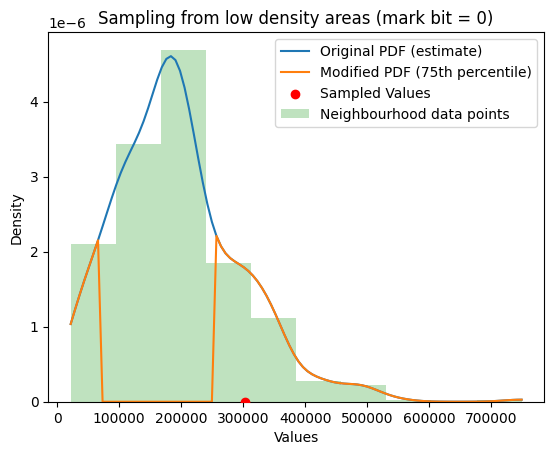

The sampled continuous value is rounded to the closest existing value from the data (to avoid perceptibility of marks) and is: 303942
The fingerprinted record is:
   Id  age  workclass  fnlwgt  education  education-num  marital-status  \
0   0   39          7   77516          9             13               4   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   

   hours-per-week  native-country  income  
0              40              38       0  


In [15]:
demo.show_embedding_iteration(0)

Detecting from record at idx: 21
Detecting from attribute: age
   Id  age  workclass  fnlwgt  education  education-num  marital-status  \
9   9   25          4  159449          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
9           4             0     4    1          5178             0   

   hours-per-week  native-country  income  
9              40              38       1  
Fingerpritned value: 36
----------------------------------------------------------

--> Observing the distribution of target attribute age below...
Mark bit (where in distribution falls the target value?): 0 (i.e. tails of distribution)
Mask bit (from PRNG): 1
Fingerprint bit index (from PRNG): 110
Fingerprint bit value (mark bit xor mask bit): 1

Fingerprint bit CORRECT :)


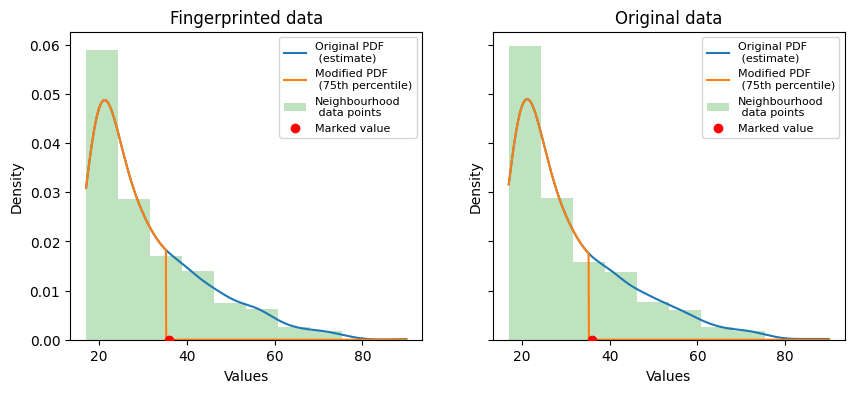

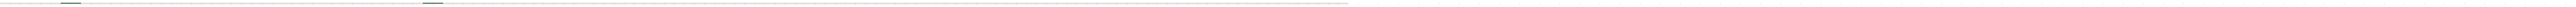

Table: fingerprint count updates after this iteration (iteration 9). Each column is one fingerprint bit position (e.g. 16-bit --> 16 columns), and each row represents votes for either 0 or 1 being the value of that bit. The final decision is made at the end af the detection algorithm according to majority vote.


In [16]:
demo.show_detection_iteration(9)

In [17]:
demo.get_error_iterations()

[1,
 5,
 7,
 8,
 13,
 14,
 15,
 20,
 25,
 26,
 27,
 29,
 30,
 31,
 44,
 46,
 48,
 49,
 62,
 70,
 73,
 74,
 75,
 77,
 79,
 83,
 86,
 89,
 92,
 96,
 97,
 101,
 102,
 103,
 106,
 107,
 109,
 110,
 111,
 132,
 133,
 136,
 137,
 138,
 143,
 150,
 151,
 153,
 154,
 155,
 156,
 163,
 164,
 174,
 188,
 189,
 192,
 214,
 215,
 219,
 221,
 222,
 224,
 226,
 227,
 236,
 237,
 238,
 240,
 241,
 246,
 257,
 259,
 260,
 261,
 266,
 267,
 269,
 273,
 275,
 276,
 285,
 286,
 288,
 297,
 299,
 307,
 308,
 311,
 312,
 315,
 319,
 320,
 322,
 329,
 330,
 331,
 333,
 335,
 336,
 341,
 344,
 347,
 348,
 353,
 354,
 360,
 362,
 363,
 364,
 367,
 374,
 381,
 383,
 388,
 389,
 391,
 399,
 402,
 404,
 408,
 411,
 412,
 414,
 420,
 421,
 422,
 425,
 428,
 431,
 433,
 440,
 443,
 446,
 450,
 453,
 455,
 456,
 457,
 459,
 467,
 468,
 470,
 472,
 473,
 476,
 481,
 484,
 488,
 489,
 494,
 501,
 502,
 507,
 511,
 514,
 515,
 516,
 520,
 522,
 527,
 529,
 530,
 531,
 533,
 535,
 536,
 539,
 542,
 544,
 545,
 546,
 54